<a href="https://colab.research.google.com/github/skywalker00001/TEXT_assignment/blob/main/text_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount resource and Import libraries

In [ ]:
# mounting
from google.colab import drive

drive.mount('/content/drive')
root = 'drive/MyDrive/TEXT_assignment/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import random
import string
import math
from collections import defaultdict
from collections import Counter
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd


SEED = 2
random.seed(SEED)

In [ ]:
# Install the required packages for this lab

!pip install nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.tag import pos_tag

 # STEMMING
from nltk.stem import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# add to the stopwords
stop_words_list = stopwords.words('english')
stop_words_list.append('\'s')
stop_words_list.append('n\'t')
print(stop_words_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# stemming examples
stemming_word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}".format("Word","Stemmed variant"))
print()

for word in stemming_word_list:
      print("{0:20}{1:20}".format(word,porter.stem(word)))

Word                Stemmed variant     

friend              friend              
friendship          friendship          
friends             friend              
friendships         friendship          
stabil              stabil              
destabilize         destabil            
misunderstanding    misunderstand       
railroad            railroad            
moonlight           moonlight           
football            footbal             


# Get 2 bussiness ids and the reviews

In [ ]:
business_id = []

with open(root + 'yelp_academic_dataset_business.json', encoding='utf-8') as f:
    for line in f:
        line_contents = json.loads(line)
        business_id.append(line_contents['business_id'])
        # business_id.append(line_contents)
        # id = line_contents['business_id']
        # print(id)
    f.close()

In [ ]:
b1 = random.randint(0, len(business_id))
b1_id = business_id[b1]
b2 = random.randint(0, len(business_id))
b2_id = business_id[b2]

print(b1)
print(b1_id)
print(b2)
print(b2_id)

14824
PyWyXv_pe5Rx4NRROFMm4w
24008
ZGXCnjEclvcXevrLOmBamQ


In [ ]:
def get_reviews(b_id):
    b_reviews = []
    with open(root + 'yelp_academic_dataset_review.json', encoding='utf-8') as f:
        for line in f:
            line_contents = json.loads(line)
            if (line_contents['business_id'] == b_id):
                b_reviews.append(line_contents['text'])
        f.close()
    return b_reviews

In [ ]:
b1_reviews = get_reviews(b1_id)
b2_reviews = get_reviews(b2_id)

print(len(b1_reviews))
print(b1_reviews[0])
print(len(b2_reviews))
print(b2_reviews[0])

34
This place is great! Prices are very reasonable and the guys there are knowlegable and curious. They got the work done pretty fast and they even gave me a ride to my work when I dropped my truck off. I will definitely go here for cuter tire stuff.
11
Love this place to get my eyebrows threaded.   My only regret is that its not closer to my house or else I would go more often. :(  It is in a very nice art friendly complex in Old 4th Ward.


# Clean data

In [ ]:
def clean_corpus(corpus, stopword_removal=False, stemming=False):
    # lowercase
    corpus = [t.lower() for t in corpus] 
    # join corpus together
    corpus = ' '.join(corpus)
    # tokenization
    corpus = word_tokenize(corpus)
    #remove punctuation
    corpus = [t for t in corpus if t not in string.punctuation]
    # remove stopword
    if (stopword_removal == True):
        corpus = [t for t in corpus if t not in stop_words_list]
    # stemming
    if (stemming == True):
        corpus = [porter.stem(t) for t in corpus]
    bow = Counter(corpus).most_common()
    return bow

In [ ]:
'''
b1_original_bow = clean_corpus(b1_reviews)
b1_stop_removed = clean_corpus(b1_reviews, stopword_removal=True)
b1_stemming_only = clean_corpus(b1_reviews, stopword_removal=False, stemming=True)
b1_stemming_stop = clean_corpus(b1_reviews, stopword_removal=True, stemming=True)

print(b1_original_bow)
print(b1_stop_removed)
print(b1_stemming_only)
print(b1_stemming_stop)
'''

'\nb1_original_bow = clean_corpus(b1_reviews)\nb1_stop_removed = clean_corpus(b1_reviews, stopword_removal=True)\nb1_stemming_only = clean_corpus(b1_reviews, stopword_removal=False, stemming=True)\nb1_stemming_stop = clean_corpus(b1_reviews, stopword_removal=True, stemming=True)\n\nprint(b1_original_bow)\nprint(b1_stop_removed)\nprint(b1_stemming_only)\nprint(b1_stemming_stop)\n'

# Plot zipf's law (Word Frequency Distribution)

In [ ]:
def zipf(bow, title="Zipf plot"):
    freqs = [i[1] for i in bow]
    ranks = [i+1 for i in range(len(freqs))]
    plt.loglog(ranks, freqs, 'r-')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('frequency(f)', fontsize=12, fontweight='bold')
    plt.ylabel('rank(r)', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
'''
zipf(b1_original_bow, title='original')
zipf(b1_stemming_stop, title='stemming_stop')
'''

"\nzipf(b1_original_bow, title='original')\nzipf(b1_stemming_stop, title='stemming_stop')\n"

# List 10 most frequent words

In [ ]:
# a helper function to write the count of words
def autolabel(rects): 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, "%i" % int(height))

In [ ]:
def plt_common_words(corpus, title="Word Frequency", num=10):
    x = [i[0] for i in corpus][0:num]
    y = [i[1] for i in corpus][0:num]
    autolabel(plt.bar(range(len(x)), y, color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'], align = 'center', tick_label=x))
    plt.title(title) 
    plt.xlabel('Word') 
    plt.ylabel('Frequency') 
    plt.tight_layout()
    plt.show()

In [ ]:
'''
plt_common_words(b1_original_bow)
plt_common_words(b1_stop_removed, title="remove stopwords only")
plt_common_words(b1_stemming_stop, title="stem and remove stopwords")
'''

'\nplt_common_words(b1_original_bow)\nplt_common_words(b1_stop_removed, title="remove stopwords only")\nplt_common_words(b1_stemming_stop, title="stem and remove stopwords")\n'

# Combine pictures together

In [ ]:
def draw_words_distribution(corpus, name=''):
    original_bow = clean_corpus(corpus)
    stop_removed = clean_corpus(corpus, stopword_removal=True)
    stemming_only = clean_corpus(corpus, stopword_removal=False, stemming=True)
    stemming_stop = clean_corpus(corpus, stopword_removal=True, stemming=True)

    print(original_bow)
    print(stemming_only)
    # do not remove stop words!!!
    zipf(original_bow, title=name+' zipf\'s law before stemming')
    zipf(stemming_only, title=name+' zipf\'s law after stemming')

    print(stop_removed)
    print(stemming_stop)
    # remove stop words when list most common ones!!!
    plt_common_words(stop_removed, title=name+' top10 words before stemming')
    plt_common_words(stemming_stop, title=name+' top10 words after stemming')

[('the', 171), ('and', 162), ('to', 154), ('i', 141), ('a', 118), ('they', 66), ('of', 62), ('my', 61), ('was', 56), ('me', 50), ("'s", 50), ('on', 49), ('in', 47), ('gary', 46), ('car', 44), ('it', 44), ('for', 41), ('had', 33), ('with', 31), ('is', 29), ('back', 25), ('auto', 25), ('that', 24), ('do', 23), ('engine', 22), ("n't", 22), ('have', 21), ('an', 20), ('did', 19), ('this', 18), ('up', 18), ('care', 18), ('be', 18), ('work', 17), ('at', 16), ('shop', 16), ('very', 15), ('about', 15), ('out', 15), ('you', 15), ('even', 14), ('but', 14), ('so', 14), ('them', 14), ('service', 14), ('all', 13), ('took', 13), ('were', 13), ('from', 13), ('when', 12), ('go', 12), ('one', 12), ('their', 12), ('if', 12), ('not', 12), ('what', 12), ('repair', 12), ('our', 12), ('are', 11), ('guys', 11), ('off', 11), ('after', 11), ('``', 11), ("''", 11), ('just', 11), ('we', 11), ('jeff', 11), ('as', 11), ('check', 10), ('valve', 10), ('these', 10), ('charge', 10), ('get', 10), ('would', 10), ('then',

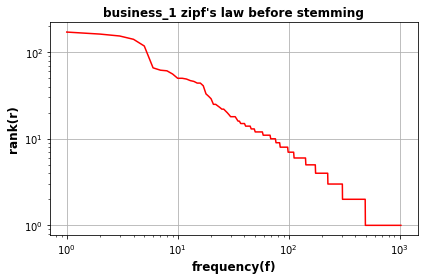

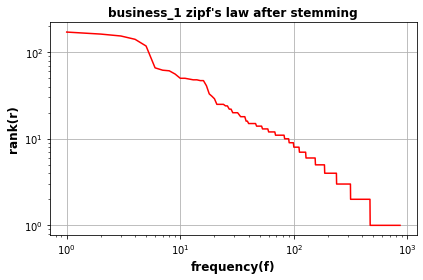

[('gary', 46), ('car', 44), ('back', 25), ('auto', 25), ('engine', 22), ('care', 18), ('work', 17), ('shop', 16), ('even', 14), ('service', 14), ('took', 13), ('go', 12), ('one', 12), ('repair', 12), ('guys', 11), ('``', 11), ("''", 11), ('jeff', 11), ('check', 10), ('valve', 10), ('charge', 10), ('get', 10), ('would', 10), ('done', 9), ('always', 9), ('mechanic', 9), ('bolt', 9), ('place', 8), ('tire', 8), ('mechanics', 8), ('light', 8), ('without', 8), ('said', 8), ('know', 8), ('first', 8), ('time', 8), ('right', 8), ('like', 8), ('gave', 7), ('less', 7), ('job', 7), ('vehicle', 7), ('never', 7), ('problems', 7), ('called', 7), ('business', 7), ('tires', 7), ('replace', 7), ('much', 7), ('great', 6), ('fast', 6), ('came', 6), ('issue', 6), ('things', 6), ('price', 6), ('part', 6), ('little', 6), ('needed', 6), ('problem', 6), ('dan', 6), ('friendly', 6), ('cost', 6), ('able', 6), ('2', 6), ('also', 6), ("'re", 6), ('new', 6), ('next', 6), ('brought', 6), ('felt', 6), ('transmission'

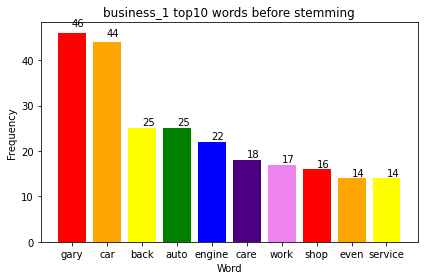

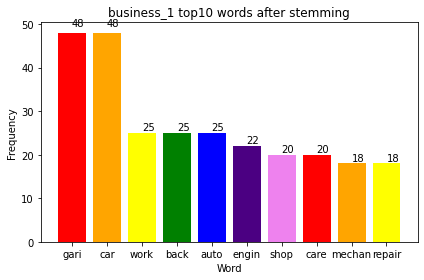

In [ ]:
draw_words_distribution(b1_reviews, name='business_1')

[('i', 46), ('the', 43), ('a', 30), ('and', 29), ('to', 24), ('was', 21), ('my', 20), ('in', 14), ('very', 12), ('is', 11), ('for', 11), ('of', 11), ('you', 11), ('it', 10), ('on', 10), ('great', 9), ('time', 9), ('have', 9), ('she', 8), ('place', 7), ('that', 7), ('...', 7), ('but', 7), ('this', 6), ('get', 6), ('her', 6), ('so', 6), ('they', 6), ('did', 6), ('got', 6), ('eyebrows', 5), ('would', 5), ('salon', 5), ('like', 5), ('there', 5), ('job', 5), ('brows', 5), ('up', 5), ('when', 5), ('threaded', 4), ('not', 4), ('nice', 4), ('had', 4), ("n't", 4), ('too', 4), ('hair', 4), ('going', 4), ('wink', 4), ('lashes', 4), ('more', 3), ('friendly', 3), ('decor', 3), ('gentle', 3), ('took', 3), ('definitely', 3), ('find', 3), ('no', 3), ('think', 3), ('since', 3), ('everyone', 3), ('your', 3), ('from', 3), ('all', 3), ('if', 3), ('also', 3), ('about', 3), ('how', 3), ('be', 3), ('do', 3), ('eyebrow', 3), ('best', 3), ('threading', 3), ('an', 3), ('waxing', 3), ('will', 3), ('went', 3), ('

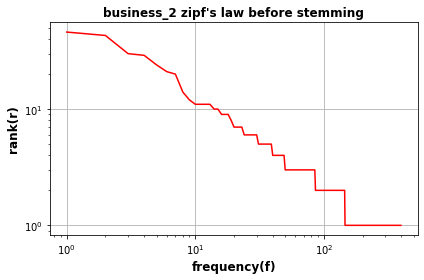

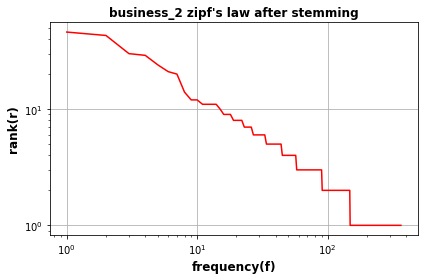

[('great', 9), ('time', 9), ('place', 7), ('...', 7), ('get', 6), ('got', 6), ('eyebrows', 5), ('would', 5), ('salon', 5), ('like', 5), ('job', 5), ('brows', 5), ('threaded', 4), ('nice', 4), ('hair', 4), ('going', 4), ('wink', 4), ('lashes', 4), ('friendly', 3), ('decor', 3), ('gentle', 3), ('took', 3), ('definitely', 3), ('find', 3), ('think', 3), ('since', 3), ('everyone', 3), ('also', 3), ('eyebrow', 3), ('best', 3), ('threading', 3), ('waxing', 3), ('went', 3), ('first', 3), ('service', 3), ('location', 3), ('wanted', 3), ('love', 2), ('regret', 2), ('staff', 2), ('even', 2), ('wait', 2), ('well', 2), ('worth', 2), ('give', 2), ('spot', 2), ('directions', 2), ('know', 2), ('must', 2), ('call', 2), ('see', 2), ('2', 2), ('3', 2), ('little', 2), ('kids', 2), ('waiting', 2), ('quiet', 2), ('experience', 2), ('receptionist', 2), ('say', 2), ('good', 2), ('5', 2), ('may', 2), ('gave', 2), ('lady', 2), ('atlanta', 2), ('rita', 2), ('friday', 2), ('results', 2), ('friend', 2), ("'m", 2),

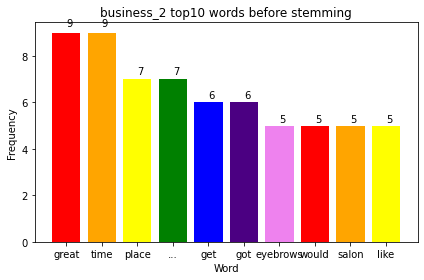

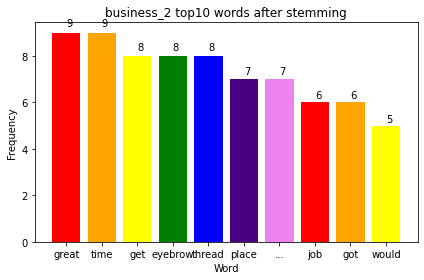

In [ ]:
draw_words_distribution(b2_reviews, name='business_2')

# POS part

In [ ]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

import spacy


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
os1 = b1_reviews[0]

#print(s1)
s1 = word_tokenize(s1)
#print(s1)
result = nltk.pos_tag(s1)

print("{0:20}{1:20}".format("Word","POS"))
print()
for (word, POS) in result:
      print("{0:20}{1:20}".format(word,POS))

Word                POS                 

This                DT                  
place               NN                  
is                  VBZ                 
great               JJ                  
!                   .                   
Prices              NNS                 
are                 VBP                 
very                RB                  
reasonable          JJ                  
and                 CC                  
the                 DT                  
guys                NNS                 
there               EX                  
are                 VBP                 
knowlegable         JJ                  
and                 CC                  
curious             JJ                  
.                   .                   
They                PRP                 
got                 VBD                 
the                 DT                  
work                NN                  
done                VBN                 
pretty         

In [ ]:
text = b1_reviews[0]
# Load English tokenizer, tagger, 
# parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
# Process whole documents
  
doc = nlp(text)

  
# Token and Tag
#for token in doc:
#  print(token, token.pos_)

result = [(str(token), str(token.pos_)) for token in doc] 
#print(result)

print("{0:20}{1:20}".format("Word","POS"))
print()
for (word, POS) in result:
      print("{0:20}{1:20}".format(word,POS))

Word                POS                 

This                DET                 
place               NOUN                
is                  AUX                 
great               ADJ                 
!                   PUNCT               
Prices              NOUN                
are                 AUX                 
very                ADV                 
reasonable          ADJ                 
and                 CCONJ               
the                 DET                 
guys                NOUN                
there               PRON                
are                 AUX                 
knowlegable         ADJ                 
and                 CCONJ               
curious             ADJ                 
.                   PUNCT               
They                PRON                
got                 VERB                
the                 DET                 
work                NOUN                
done                VERB                
pretty         